# **Final Project**

## **Problem stament :**     

The widespread dissemination of fake news and propaganda presents serious societal risks, including the erosion of public trust, political polarization, manipulation of elections, and the spread of harmful misinformation during crises such as pandemics or conflicts. From an NLP perspective, detecting fake news is fraught with challenges. Linguistically, fake news often mimics the tone and structure of legitimate journalism, making it difficult to distinguish using surface-level features. The absence of reliable and up-to-date labeled datasets, especially across multiple languages and regions, hampers the effectiveness of supervised learning models. Additionally, the dynamic and adversarial nature of misinformation means that malicious actors constantly evolve their language and strategies to bypass detection systems. Cultural context, sarcasm, satire, and implicit bias further complicate automated analysis. Moreover, NLP models risk amplifying biases present in training data, leading to unfair classifications and potential censorship of legitimate content. These challenges underscore the need for cautious, context-aware approaches, as the failure to address them can inadvertently contribute to misinformation, rather than mitigate it.



Use datasets in link : https://drive.google.com/drive/folders/1mrX3vPKhEzxG96OCPpCeh9F8m_QKCM4z?usp=sharing
to complete requirement.

## **About dataset:**

* **True Articles**:

  * **File**: `MisinfoSuperset_TRUE.csv`
  * **Sources**:

    * Reputable media outlets like **Reuters**, **The New York Times**, **The Washington Post**, etc.

* **Fake/Misinformation/Propaganda Articles**:

  * **File**: `MisinfoSuperset_FAKE.csv`
  * **Sources**:

    * **American right-wing extremist websites** (e.g., Redflag Newsdesk, Breitbart, Truth Broadcast Network)
    * **Public dataset** from:

      * Ahmed, H., Traore, I., & Saad, S. (2017): "Detection of Online Fake News Using N-Gram Analysis and Machine Learning Techniques" *(Springer LNCS 10618)*



## **Requirement**

A team consisting of three members must complete a project that involves applying the methods learned from the beginning of the course up to the present. The team is expected to follow and document the entire machine learning workflow, which includes the following steps:

1. **Data Preprocessing**: Clean and prepare the dataset,etc.

2. **Exploratory Data Analysis (EDA)**: Explore and visualize the data.

3. **Model Building**: Select and build one or more machine learning models suitable for the problem at hand.

4. **Hyperparameter set up**: Set and adjust the model's hyperparameters using appropriate methods to improve performance.

5. **Model Training**: Train the model(s) on the training dataset.

6. **Performance Evaluation**: Evaluate the trained model(s) using appropriate metrics (e.g., accuracy, precision, recall, F1-score, confusion matrix, etc.) and validate their performance on unseen data.

7. **Conclusion**: Summarize the results, discuss the model's strengths and weaknesses, and suggest possible improvements or future work.





# Read dataset

In [1]:
!pip install contractions
!pip install textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 3.8 MB/s eta 0:00:00


In [64]:
import re
import pandas as pd

import contractions
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from transformers import BertTokenizer
from textblob import TextBlob
from textstat import textstat

from collections import Counter

In [3]:
true_df = pd.read_csv("/kaggle/input/misinfo/DataSet_Misinfo_TRUE.csv")
true_df

,Unnamed: 0,text
0,0,The head of a conservative Republican faction ...
1,1,Transgender people will be allowed for the fir...
2,2,The special counsel investigation of links bet...
3,3,Trump campaign adviser George Papadopoulos tol...
4,4,President Donald Trump called on the U.S. Post...
...,...,...
34970,34970,Most conservatives who oppose marriage equalit...
34971,34971,The freshman senator from Georgia quoted scrip...
34972,34972,The State Department told the Republican Natio...
34973,34973,"ADDIS ABABA, Ethiopia —President Obama convene..."


In [4]:
fake_df = pd.read_csv("/kaggle/input/misinfo/DataSet_Misinfo_FAKE.csv")
fake_df

,Unnamed: 0,text
0,0,Donald Trump just couldn t wish all Americans ...
1,1,House Intelligence Committee Chairman Devin Nu...
2,2,"On Friday, it was revealed that former Milwauk..."
3,3,"On Christmas day, Donald Trump announced that ..."
4,4,Pope Francis used his annual Christmas Day mes...
...,...,...
43637,44422,The USA wants to divide Syria.\r\n\r\nGreat Br...
43638,44423,The Ukrainian coup d'etat cost the US nothing ...
43639,44424,The European Parliament falsifies history by d...
43640,44425,The European Parliament falsifies history by d...


In [5]:
# Delete order column
true_df = true_df.drop('Unnamed: 0', axis=1)
fake_df = fake_df.drop('Unnamed: 0', axis=1)

In [6]:
true_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34975 entries, 0 to 34974
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    34946 non-null  object
dtypes: object(1)
memory usage: 273.4+ KB


In [7]:
fake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43642 entries, 0 to 43641
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    43642 non-null  object
dtypes: object(1)
memory usage: 341.1+ KB


In [8]:
true_df.describe()

,text
count,34946
unique,34526
top,"Killing Obama administration rules, dismantlin..."
freq,58


In [9]:
fake_df.describe()

,text
count,43642
unique,34078
top,Leave a Reply Click here to get more info on f...
freq,38


# Data Preprocessing

- Xử lý giá trị null

In [10]:
true_df.isnull().sum()

text    29
dtype: int64

In [11]:
fake_df.isnull().sum()

text    0
dtype: int64

In [12]:
true_df = true_df.dropna()

- Xử lý giá trị duplicate

In [13]:
true_df.duplicated().sum()

420

In [14]:
fake_df.duplicated().sum()

9564

In [15]:
true_df = true_df.drop_duplicates()
fake_df = fake_df.drop_duplicates()

- Thêm label và gộp 2 tập dữ liệu

In [16]:
true_df['label'] = 1
fake_df['label'] = 0

df = pd.concat([true_df, fake_df], ignore_index=True)
df

,text,label
0,The head of a conservative Republican faction ...,1
1,Transgender people will be allowed for the fir...,1
2,The special counsel investigation of links bet...,1
3,Trump campaign adviser George Papadopoulos tol...,1
4,President Donald Trump called on the U.S. Post...,1
...,...,...
68599,"Apparently, the new Kyiv government is in a hu...",0
68600,The USA wants to divide Syria.\r\n\r\nGreat Br...,0
68601,The Ukrainian coup d'etat cost the US nothing ...,0
68602,The European Parliament falsifies history by d...,0


In [17]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True) # Shuffle dataset
df

,text,label
0,Former Russian economy minister Alexei Ulyukay...,1
1,Republicans were just given a leg up over Demo...,0
2,This has to be one of the best remix videos ev...,0
3,"In line with the new Language Law, Russian is ...",0
4,JERUSALEM — A day after approving the const...,1
...,...,...
68599,The Super Bowl had not yet begun and Trump fan...,0
68600,U.S. House Republicans on Friday won passage o...,1
68601,Share on Facebook Share on Twitter Known to th...,0
68602,A New Jersey man who worked at the World Trade...,1


* Kiểm tra imbalance

In [18]:
df['label'].value_counts()

label
1    34526
0    34078
Name: count, dtype: int64

Dữ liệu không bị imbalance

## Clean text

- Làm sạch văn bản (lower, bỏ dấu câu, stopwords, stemming...) + Tokenizer

In [20]:
# The first running
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

In [22]:
def clean_text(row):
    """
    Generator to clean text from a pandas Series-like iterable.
    Applies regex patterns to normalize text, remove HTML tags, escape sequences, 
    special characters, URLs and whitespace.
    """
    row = str(row).lower()

    # Remove escape characters
    row = re.sub(r'[\t\r\n]', ' ', row)

    # Remove repeated special chars (ex: __, --,)
    row = re.sub(r'[_~+\-]{2,}', ' ', row)

    # Remove unwanted symbols preserving ., !, ?, -
    row = re.sub(r"[<>()|&©ø%\[\]\\~*\$€£¥]", ' ', row)

    # Remove HTML <br /> tags
    row = re.sub(r'<\s*br\s*/?\s*>', ' ', row)

    # Remove hex codes like \x92
    row = re.sub(r"\\x[0-9a-fA-F]{2}", ' ', row)

    # Extract domain from URLs
    row = re.sub(r'(https?://)([^/\s]+)([^\s]*)', r'\2', row)

    # Normalize multiple spaces
    row = re.sub(r'\s+', ' ', row)

    # Xử lý dấu câu dư kiểu ". .", "!!", "??"
    row = re.sub(r'([.?!])[\s]*\1+', r'\1', row)
    
    return row.strip()

df['clean_text'] = df['text'].apply(clean_text) # có thể xử lý ở model training
df['clean_text']

0        former russian economy minister alexei ulyukay...
1        republicans were just given a leg up over demo...
2        this has to be one of the best remix videos ev...
3        in line with the new language law, russian is ...
4        jerusalem — a day after approving the construc...
                               ...                        
68599    the super bowl had not yet begun and trump fan...
68600    u.s. house republicans on friday won passage o...
68601    share on facebook share on twitter known to th...
68602    a new jersey man who worked at the world trade...
68603    turkey and iran have agreed to discuss within ...
Name: clean_text, Length: 68604, dtype: object

In [24]:
def tokenize_and_filter(text):  # dùng cho các mô hình truyền thống như TF-IDF
    # Mở rộng các từ viết tắt (contractions)
    text = contractions.fix(text)

    # Tokenize
    tokens = word_tokenize(text)

    # Lọc stopwords và chỉ giữ từ alphabet -> stemming
    return [stemmer.stem(w) for w in tokens if w.lower() not in stop_words and w.isalpha()]

In [25]:
def tokenize_texts(tokenizer, texts, max_length=512): # dùng cho các mô hình như BERT
    return tokenizer(
        texts,
        truncation=True,      # Cắt bớt nếu dài hơn max_length
        padding=True,         # Tự động thêm padding để đồng đều độ dài
        max_length=max_length # Độ dài tối đa mỗi đoạn văn
    )

# Exploratory Data Analysis (EDA)

## Label Analysis

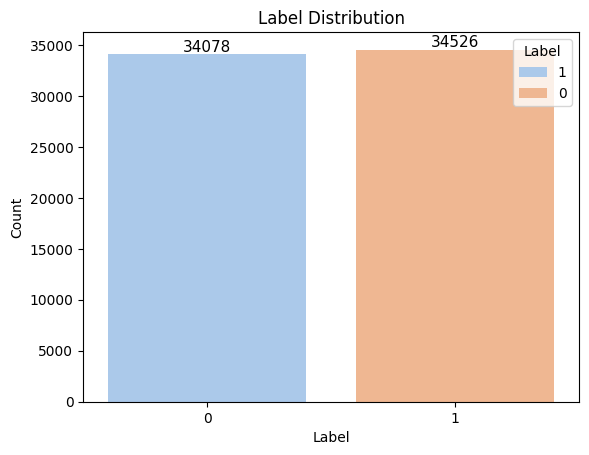

In [26]:
def plot_label_distribution(df, label_col):
    ax = sns.countplot(x=label_col, data=df, hue=label_col, palette='pastel', dodge=False)

    counts = df[label_col].value_counts().sort_index()
    for x, y in enumerate(counts.values):
        ax.text(x, y, f'{y}', ha='center', va='bottom', fontsize=11)

    plt.legend(title='Label', labels=df[label_col].unique(),)
    plt.title('Label Distribution')
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.show()

plot_label_distribution(df, 'label')

Sự chênh lệch giữa hai nhãn là rất nhỏ (chỉ 448 mẫu), cho thấy tập dữ liệu khá cân bằng giữa hai lớp.

## Distribution Analysis

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

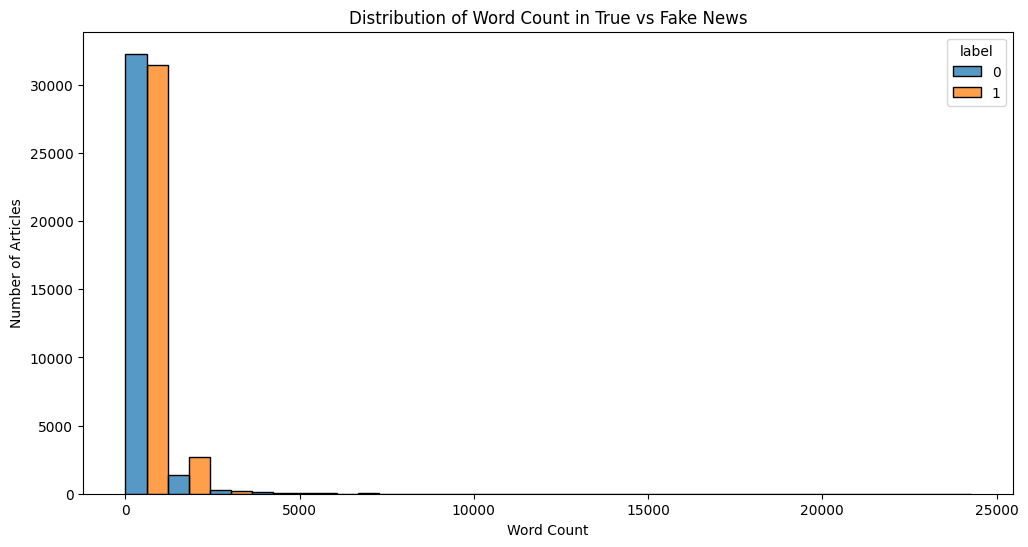

In [68]:
df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='word_count', hue='label', multiple='dodge', bins=20)
plt.title('Distribution of Word Count in True vs Fake News')
plt.xlabel('Word Count')
plt.ylabel('Number of Articles')
plt.show()

Đa số các bài viết (khoảng 30000 bài) có số từ từ 0 đến 5000, cho cả True News và Fake News, với nhãn 0 (True News) có phần vượt trội hơn. Rất ít bài viết có số từ vượt quá 10000, cho thấy phân bố tập trung chủ yếu ở các bài viết ngắn đến trung bình.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

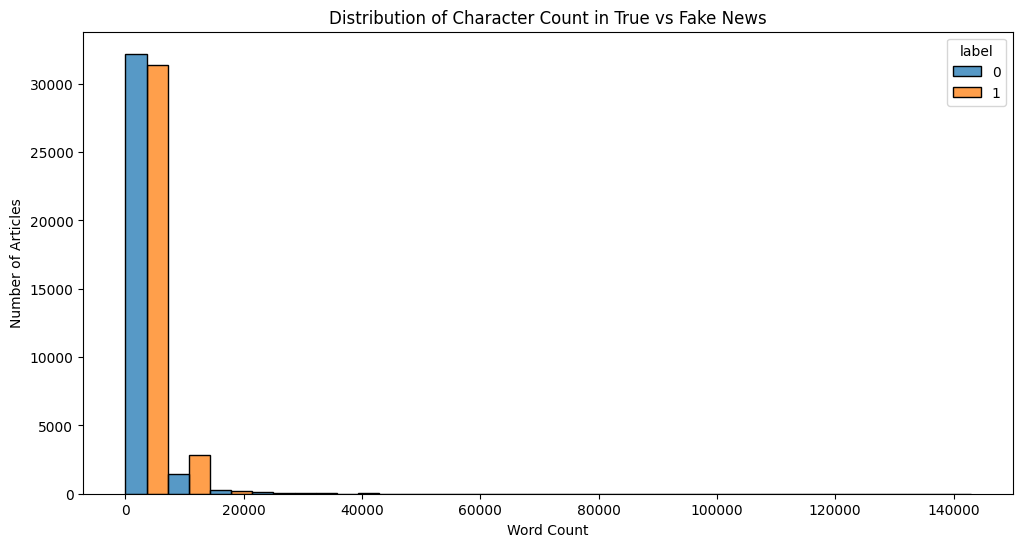

In [69]:
df['char_count'] = df['clean_text'].apply(lambda x: len(x))
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='char_count', hue='label', multiple='dodge', bins=20)
plt.title('Distribution of Character Count in True vs Fake News')
plt.xlabel('Word Count')
plt.ylabel('Number of Articles')
plt.show()

Phần lớn các bài viết (khoảng 30000 bài) có số ký tự từ 0 đến 20000, với nhãn 0 (True News) chiếm ưu thế. Số lượng giảm mạnh sau 20000 ký tự, thể hiện sự tập trung ở các bài viết có số ký tự thấp đến trung bình.

## Word Frequency Analysis

In [43]:
true_words = ' '.join(df[df['label'] == 1]['clean_text']).split()
true_words = set(true_words) 

fake_words = ' '.join(df[df['label'] == 0]['clean_text']).split()
fake_words = set(fake_words)  

common_words = true_words.intersection(fake_words)

unique_true_words = true_words - common_words
unique_fake_words = fake_words - common_words

print(f"Number of common words between true and fake news: {len(common_words)}")
print(f"Number of unique words in true news: {len(unique_true_words)}")
print(f"Number of unique words in fake news: {len(unique_fake_words)}")

Number of common words between true and fake news: 141863
Number of unique words in true news: 180495
Number of unique words in fake news: 322681


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


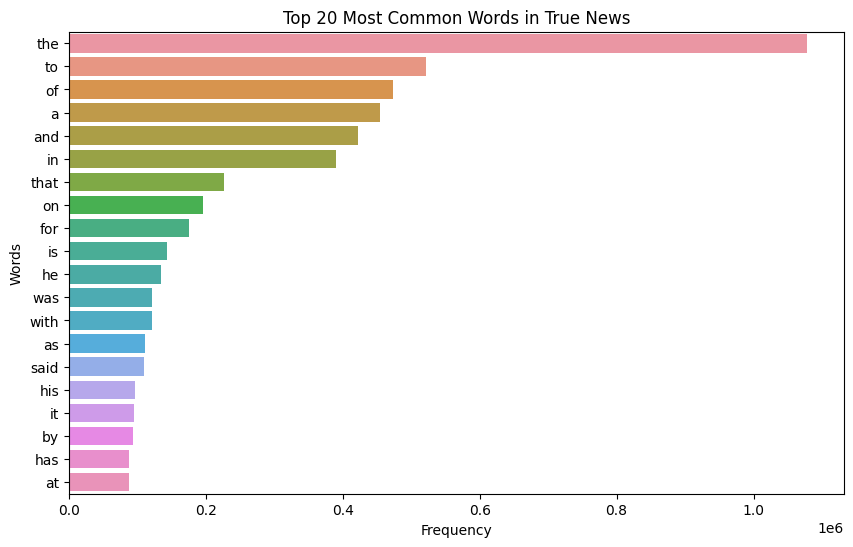

In [29]:
true_word_freq = Counter(true_words)
most_common_true = true_word_freq.most_common(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=[word[1] for word in most_common_true], y=[word[0] for word in most_common_true])
plt.title('Top 20 Most Common Words in True News')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


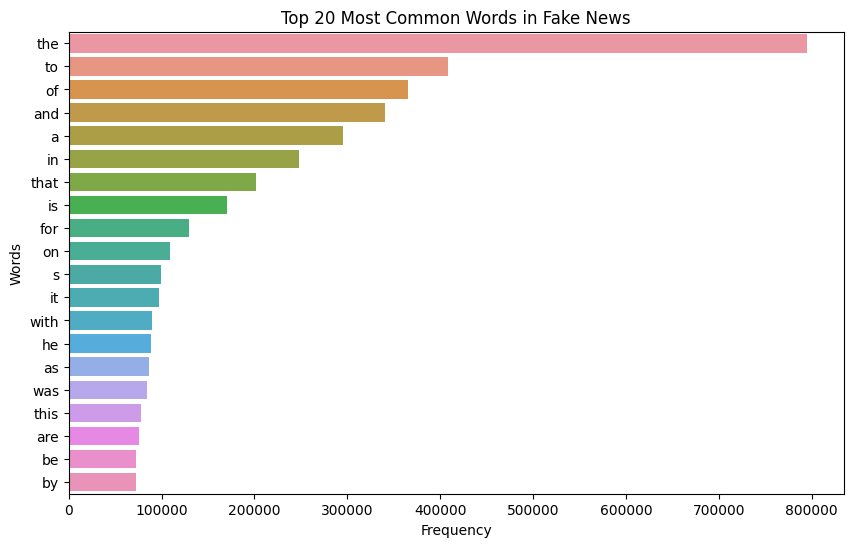

In [30]:
fake_word_freq = Counter(fake_words)
most_common_fake = fake_word_freq.most_common(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=[word[1] for word in most_common_fake], y=[word[0] for word in most_common_fake])
plt.title('Top 20 Most Common Words in Fake News')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

Cả hai đồ thị "Top 20 Most Common Words in True News" và "Top 20 Most Common Words in Fake News" đều thể hiện tần suất xuất hiện của các từ phổ biến nhất trong từng loại tin tức. Từ `the` dẫn đầu với tần suất cao nhất trong cả hai trường hợp, tiếp theo là `to`, `of`, và `and`, cho thấy đây là các từ chức năng phổ biến. True News có tần suất tối đa khoảng 1 triệu, trong khi Fake News có tần suất cao hơn đáng kể, lên đến gần 8 triệu, phản ánh mật độ từ cao hơn trong Fake News.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


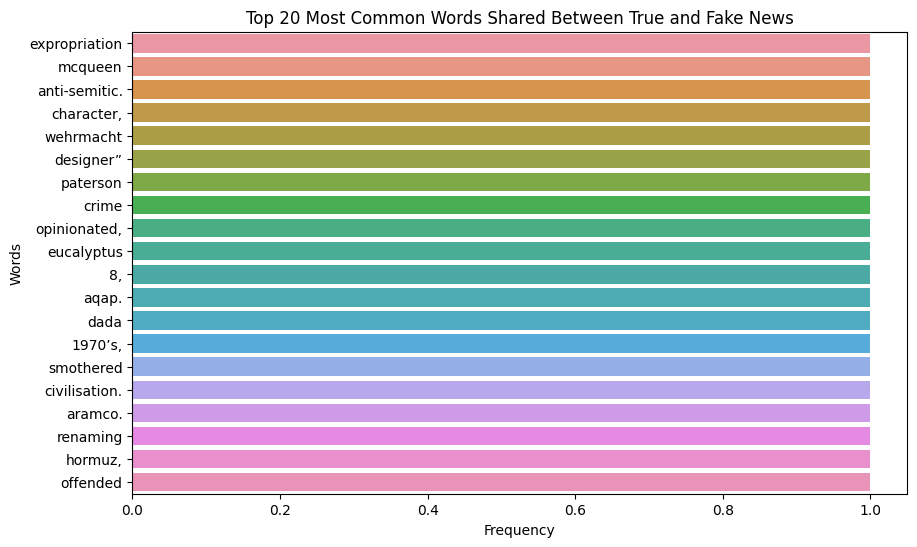

In [44]:
common_word_freq = Counter(common_words)
most_common_shared = common_word_freq.most_common(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=[word[1] for word in most_common_shared], y=[word[0] for word in most_common_shared])
plt.title('Top 20 Most Common Words Shared Between True and Fake News')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

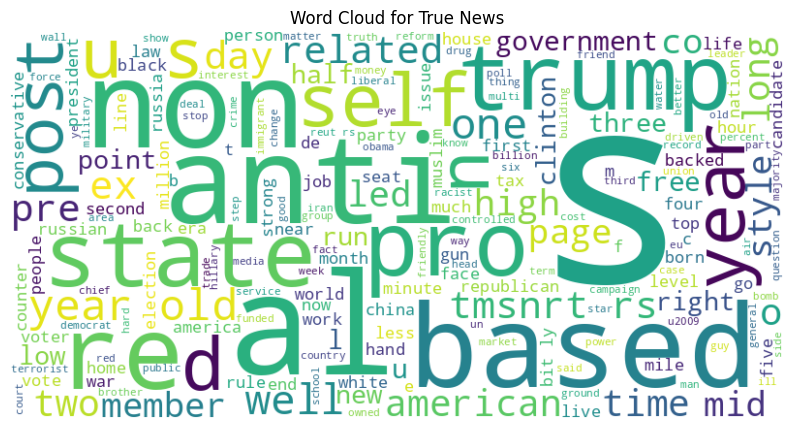

In [46]:
true_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(true_words))

plt.figure(figsize=(10, 6))
plt.imshow(true_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for True News')
plt.axis('off')
plt.show()

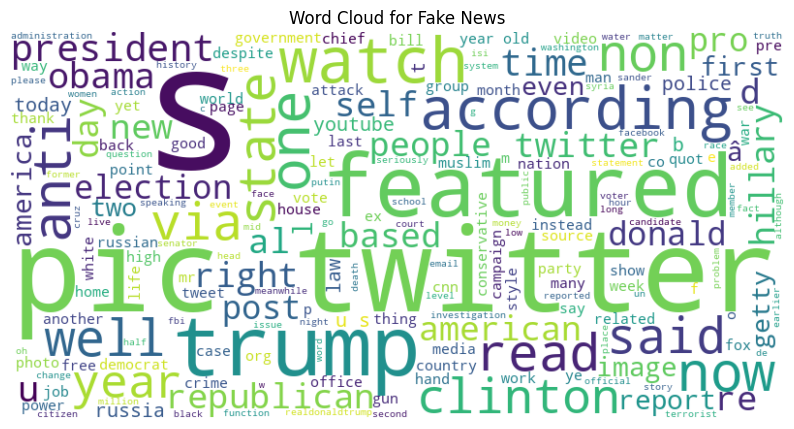

In [48]:
fake_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(fake_words))

plt.figure(figsize=(10, 6))
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Fake News')
plt.axis('off')
plt.show()

Cả hai đều có sự xuất hiện của `trump` và `clinton` với kích thước lớn, nhưng Fake News có thêm các từ liên quan đến phương tiện truyền thông (như `twitter`, `youtube`, `video`) và từ cảm xúc (như `good`, `attack`), gợi ý sự khác biệt về phong cách và nội dung so với True News chỉ tập trung vào các thuật ngữ chính trị và hành chính.

## n-grams

In [34]:
def get_top_n_grams(corpus, ngram_range=(2, 2), n=None):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


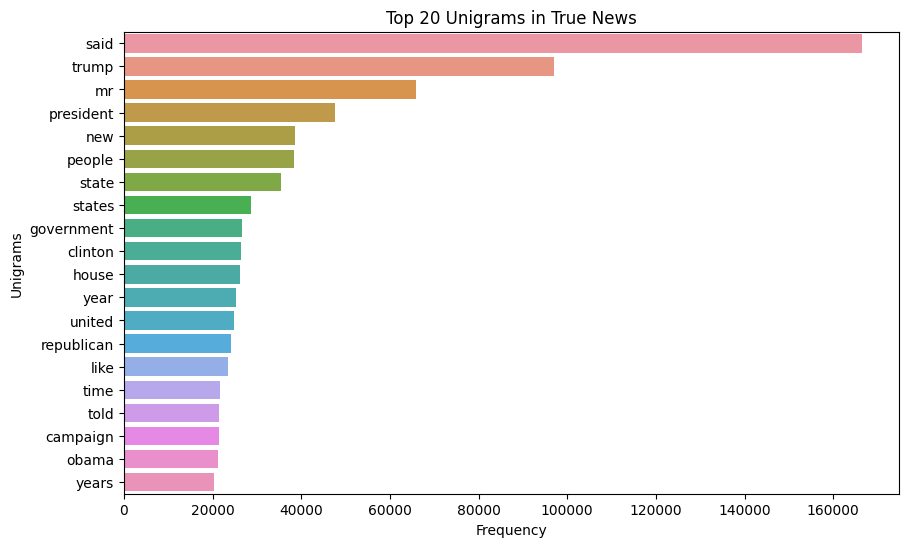

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


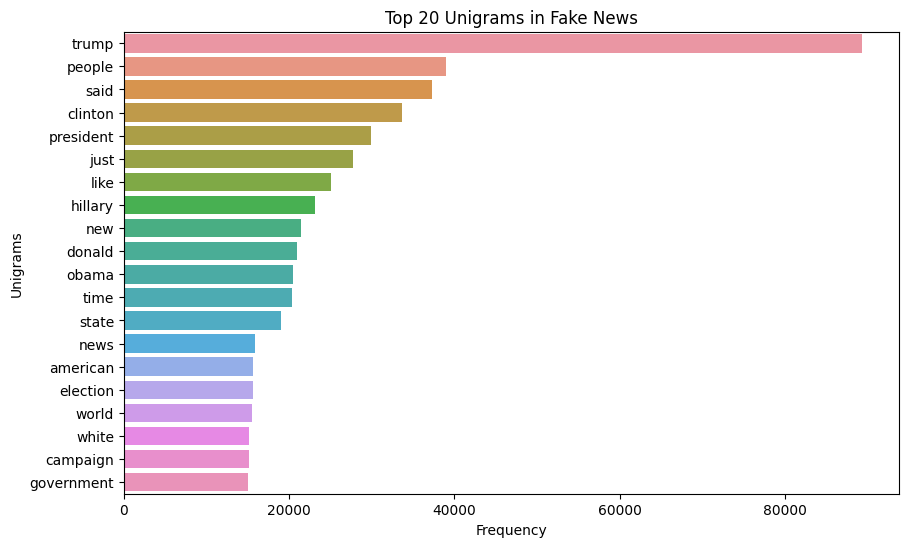

In [35]:
top_positive_unigrams = get_top_n_grams(df[df['label'] == 1]['clean_text'], ngram_range=(1, 1), n=20)
top_negative_unigrams = get_top_n_grams(df[df['label'] == 0]['clean_text'], ngram_range=(1, 1), n=20)

plt.figure(figsize=(10, 6))
sns.barplot(x=[word[1] for word in top_positive_unigrams], y=[word[0] for word in top_positive_unigrams])
plt.title('Top 20 Unigrams in True News')
plt.xlabel('Frequency')
plt.ylabel('Unigrams')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=[word[1] for word in top_negative_unigrams], y=[word[0] for word in top_negative_unigrams])
plt.title('Top 20 Unigrams in Fake News')
plt.xlabel('Frequency')
plt.ylabel('Unigrams')
plt.show()

Trong True News, `said` dẫn đầu với tần suất cao nhất (gần 160,000), theo sau là `trump`, `mr`, `president`, và `new`, cho thấy sự tập trung vào phát ngôn và các nhân vật chính trị. Trong Fake News, `trump` đứng đầu với tần suất vượt trội (gần 80,000), tiếp theo là `people`, `said`, `clinton` và `president`, phản ánh sự chú trọng vào các nhân vật chính trị và công chúng.

True News có tần suất tổng thể cao hơn (lên đến 160,000), trong khi Fake News có phạm vi tần suất thấp hơn (tối đa 80,000), nhưng danh sách từ đa dạng hơn với các thuật ngữ như `election` và `world`.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


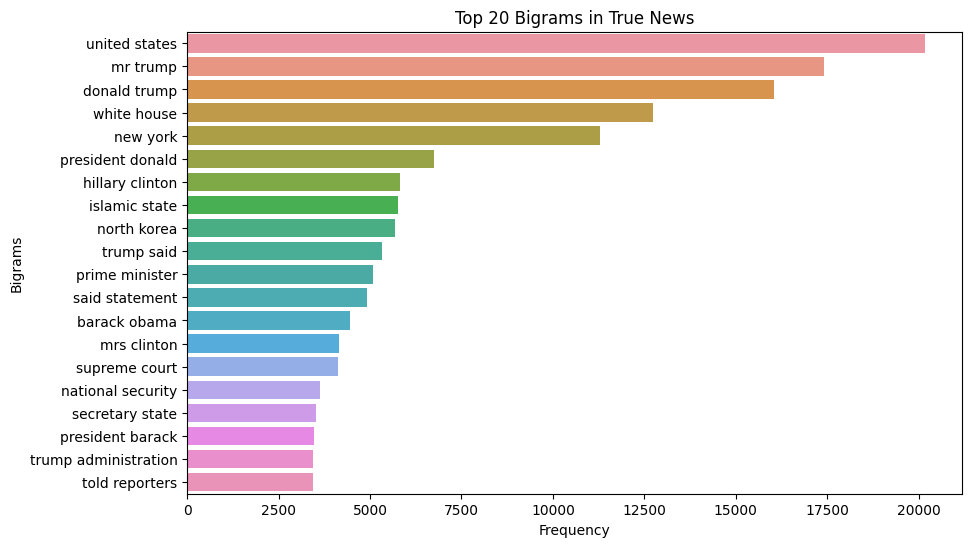

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


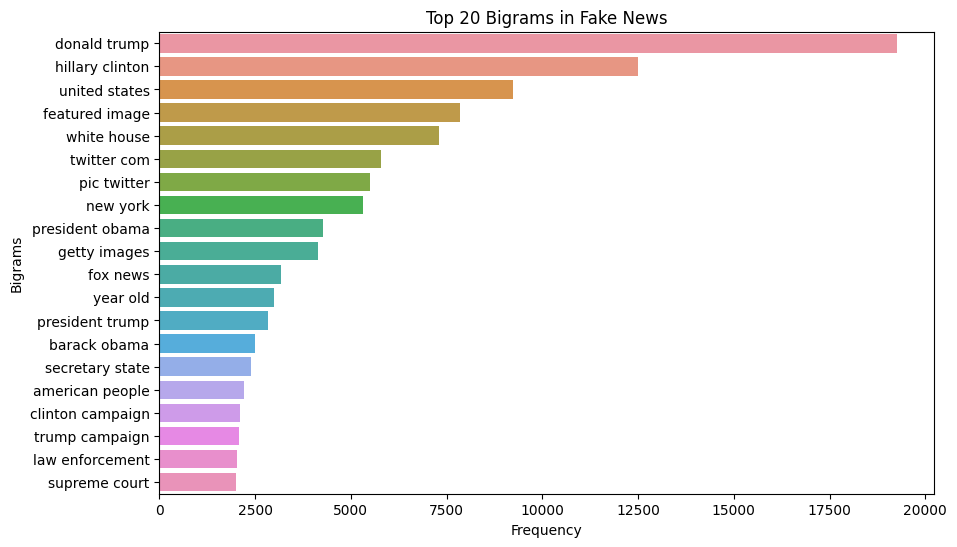

In [39]:
top_positive_bigrams = get_top_n_grams(df[df['label'] == 1]['clean_text'], ngram_range=(2, 2), n=20)
top_negative_bigrams = get_top_n_grams(df[df['label'] == 0]['clean_text'], ngram_range=(2, 2), n=20)

plt.figure(figsize=(10, 6))
sns.barplot(x=[word[1] for word in top_positive_bigrams], y=[word[0] for word in top_positive_bigrams])
plt.title('Top 20 Bigrams in True News')
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=[word[1] for word in top_negative_bigrams], y=[word[0] for word in top_negative_bigrams])
plt.title('Top 20 Bigrams in Fake News')
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.show()

Cả hai đều có sự xuất hiện mạnh của `trump`, `clinton`, và `united states`, nhưng True News tập trung hơn vào các thuật ngữ chính thức (như `prime minister`, `supreme court`) với tần suất giảm đều, trong khi Fake News có thêm các từ liên quan đến truyền thông (như `twitter com`, `pic twitter`) và hình ảnh (như `featured image`, `getty images`), cho thấy sự khác biệt về phong cách và nguồn thông tin.

## TP-IDF

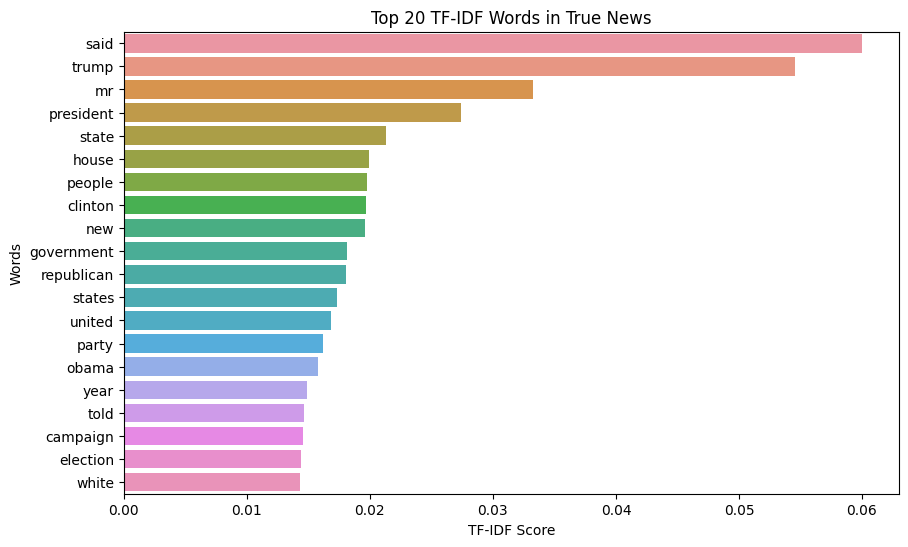

In [58]:
true_reviews = df[df['label'] == 1]['clean_text']
tfidf_vectorizer_true = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_true = tfidf_vectorizer_true.fit_transform(true_reviews)
true_top_words = pd.DataFrame(tfidf_true.toarray(), columns=tfidf_vectorizer_true.get_feature_names_out()).mean().sort_values(ascending=False)[:20]

plt.figure(figsize=(10, 6))
sns.barplot(x=true_top_words.values, y=true_top_words.index)
plt.title('Top 20 TF-IDF Words in True News')
plt.xlabel('TF-IDF Score')
plt.ylabel('Words')
plt.show()

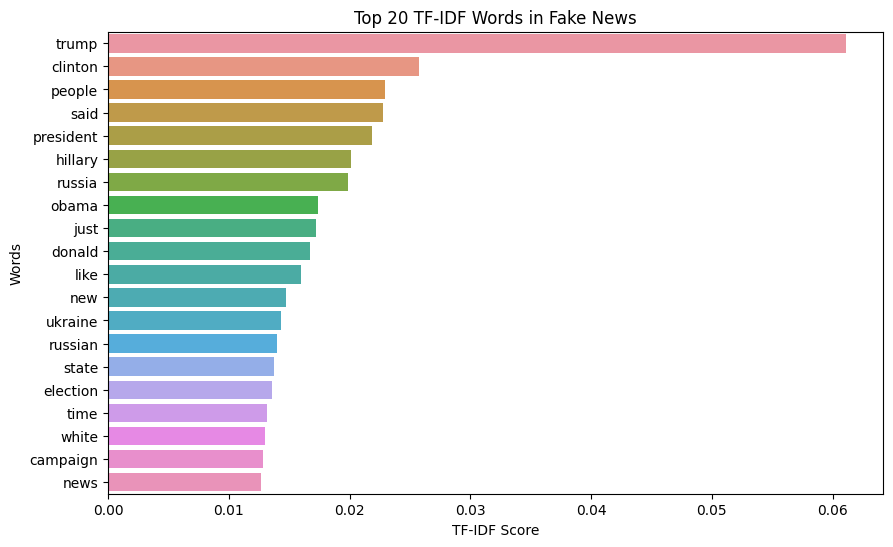

In [59]:
fake_reviews = df[df['label'] == 0]['clean_text']
tfidf_vectorizer_fake = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_fake = tfidf_vectorizer_fake.fit_transform(fake_reviews)
fake_top_words = pd.DataFrame(tfidf_fake.toarray(), columns=tfidf_vectorizer_fake.get_feature_names_out()).mean().sort_values(ascending=False)[:20]

plt.figure(figsize=(10, 6))
sns.barplot(x=fake_top_words.values, y=fake_top_words.index)
plt.title('Top 20 TF-IDF Words in Fake News')
plt.xlabel('TF-IDF Score')
plt.ylabel('Words')
plt.show()

Cả hai đều có sự xuất hiện mạnh của `trump`, `clinton`, `president`, và `said`, nhưng True News nhấn mạnh các thuật ngữ hành chính (như `government`, `state`) với điểm TF-IDF giảm đều, trong khi Fake News nổi bật với các từ như `hillary`, `obama`, và `russia`, gợi ý sự tập trung vào các cá nhân và sự kiện cụ thể.

## Textual Feature Distribution Analysis

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

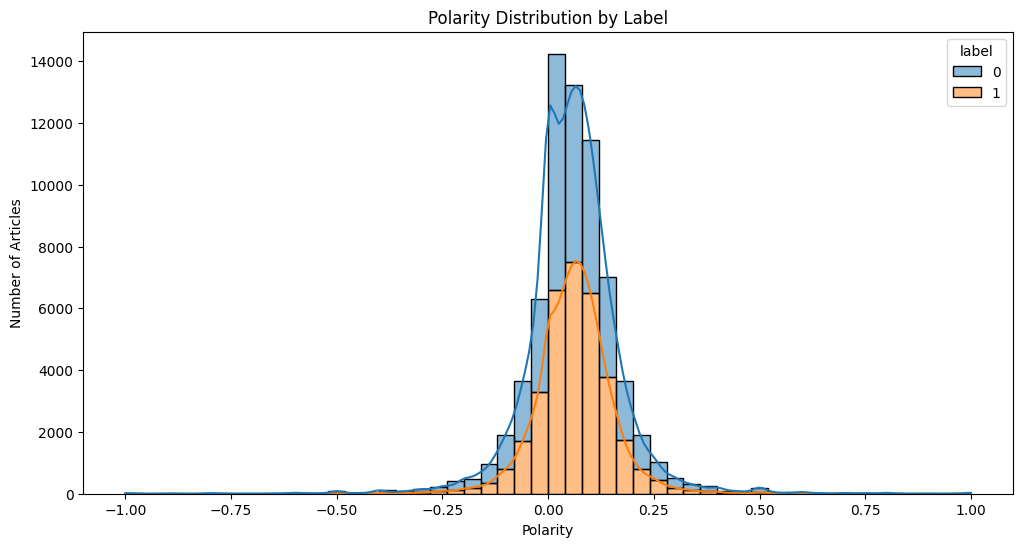

In [60]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity
    
df['polarity'] = df['clean_text'].apply(get_polarity)

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='polarity', hue='label', multiple='stack', bins=50, kde=True)
plt.title('Polarity Distribution by Label')
plt.xlabel('Polarity')
plt.ylabel('Number of Articles')
plt.show()

Phân phối của cả hai nhãn (0 và 1) tập trung chủ yếu quanh giá trị Polarity gần 0, rất ít bài viết với Polarity cực đoan (dưới -0.75 hoặc trên 0.75) cho thấy phần lớn các bài viết có độ tích cực hoặc tiêu cực trung bình. Nhãn 0 (Fake News) có số lượng bài viết cao hơn đáng kể so với nhãn 1 (True News).

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

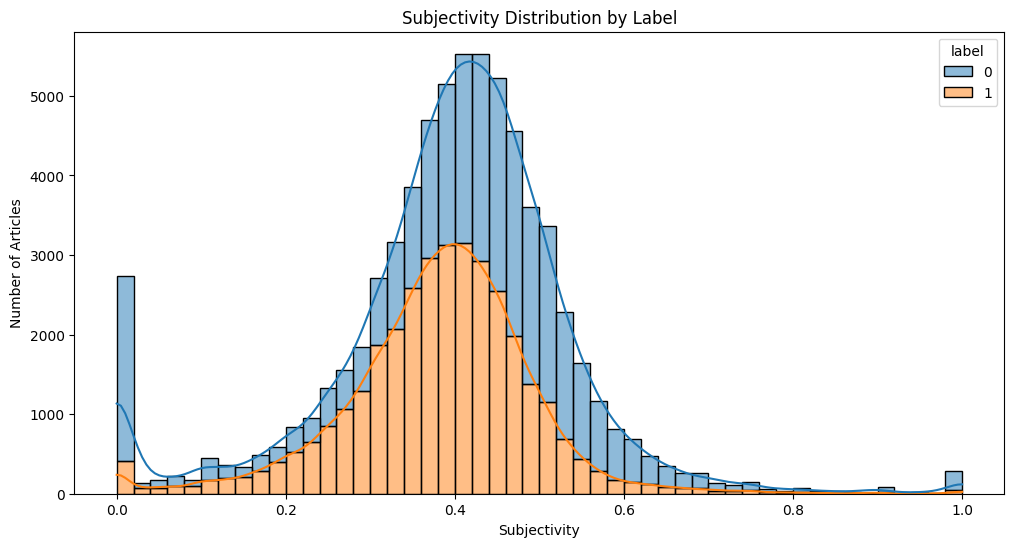

In [61]:
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity
    
df['subjectivity'] = df['clean_text'].apply(get_subjectivity)

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='subjectivity', hue='label', multiple='stack', bins=50, kde=True)
plt.title('Subjectivity Distribution by Label')
plt.xlabel('Subjectivity')
plt.ylabel('Number of Articles')
plt.show()

Phân phối của cả hai nhãn (0 và 1) tập trung chủ yếu ở giá trị Subjectivity từ 0 đến 0.6, rất ít bài viết lớn hơn 0.6. Nhãn 0 (Fake News) chiếm ưu thế tổng thể và có số lượng bài viết cao vượt trội hơn nhãn 1 ở giá trị 0.1 với khoảng 3.000 bài viết.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

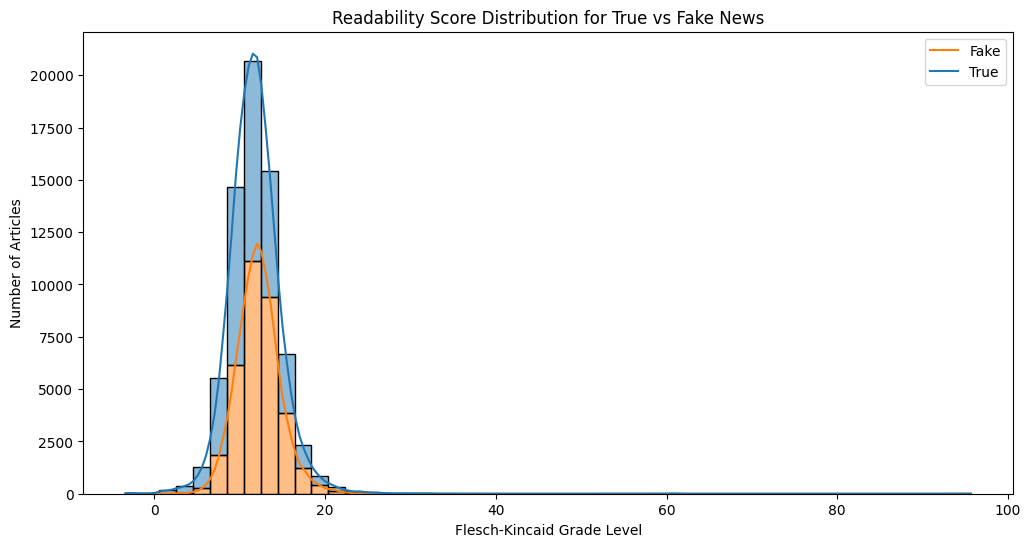

In [65]:
def get_flesch_kincaid(text):
    return textstat.flesch_kincaid_grade(text)

df['readability_score'] = df['clean_text'].apply(get_flesch_kincaid)

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='readability_score', hue='label', multiple='stack', bins=50, kde=True)
plt.title('Readability Score Distribution for True vs Fake News')
plt.xlabel('Flesch-Kincaid Grade Level')
plt.ylabel('Number of Articles')
plt.legend(labels=['Fake', 'True'])
plt.show()

Phân phối của cả tin thật (nhãn 1) và tin giả (nhãn 0) tập trung chủ yếu ở mức Flesch-Kincaid Grade Level từ 0 đến 40, cả hai loại tin đều có số lượng giảm mạnh khi Flesch-Kincaid Grade Level tăng trên 40, với rất ít bài viết ở mức trên 80, cho thấy cả hai loại đều có mức độ dễ đọc.

## Bonus

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

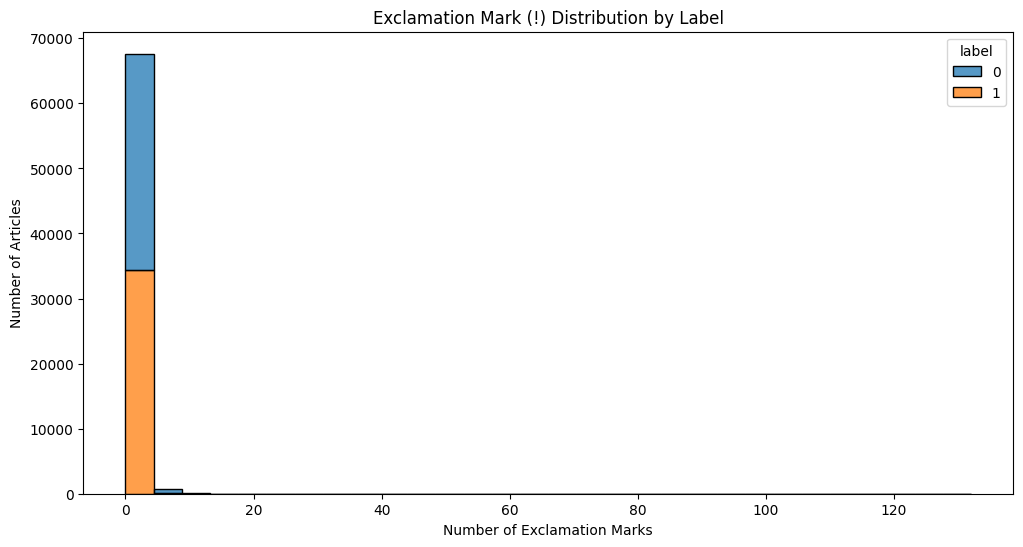

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

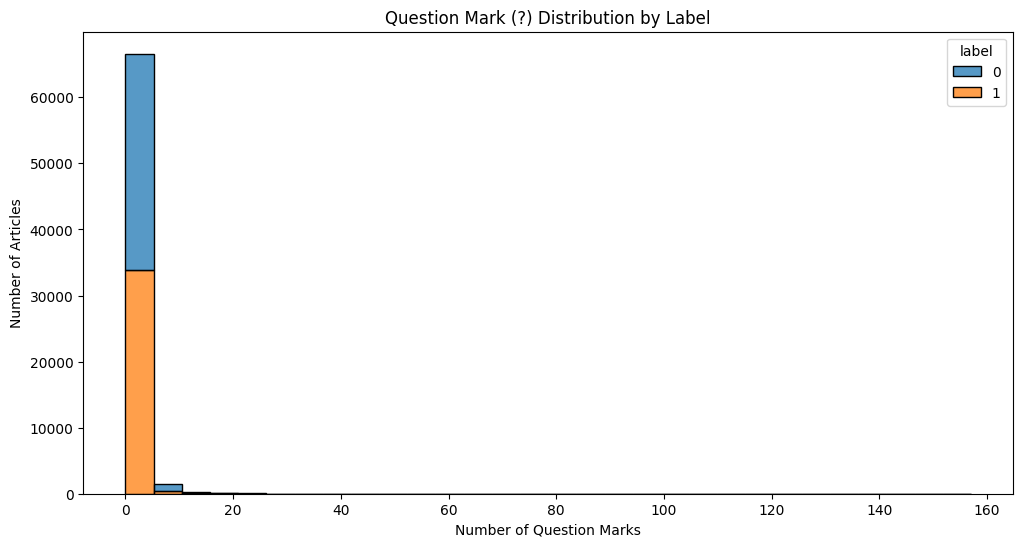

In [66]:
def count_punctuation(text, punct):
    return text.count(punct)

df['exclamation_count'] = df['clean_text'].apply(lambda x: count_punctuation(x, '!'))
df['question_count'] = df['clean_text'].apply(lambda x: count_punctuation(x, '?'))

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='exclamation_count', hue='label', multiple='stack', bins=30)
plt.title('Exclamation Mark (!) Distribution by Label')
plt.xlabel('Number of Exclamation Marks')
plt.ylabel('Number of Articles')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='question_count', hue='label', multiple='stack', bins=30)
plt.title('Question Mark (?) Distribution by Label')
plt.xlabel('Number of Question Marks')
plt.ylabel('Number of Articles')
plt.show()

In [72]:
df = df[['text', 'label', 'clean_text']]